In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import random
from tqdm import tqdm
import time 

# Generator Function 

In [3]:
# Noise Range between -2 and 2 --> Return tensor with length seq_len
# Target if integral
def integration_task(seq_len, num_samples, r = 2):
    for i in range(num_samples):
        noise_sample = []
        for j in range(seq_len):
            noise_sample.append(random.uniform(-r, r))
        target = np.trapz(noise_sample)
        if target < 0: target = -1
        else: target = 1
        yield noise_sample, target



In [4]:
noise_gen = integration_task(seq_len = 10, num_samples = 3, r = 2)
noise_func1, noise_target1 = next(noise_gen)
noise_func2, noise_target2 = next(noise_gen)
noise_func3, noise_target3 = next(noise_gen)




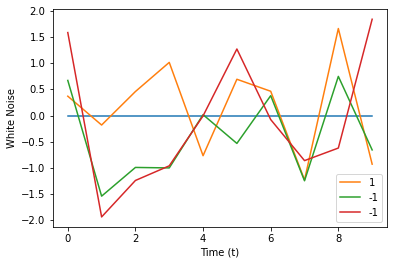

In [5]:
plt.figure()
line0, = plt.plot(np.zeros_like(noise_func1))
line1, = plt.plot(noise_func1)
line2, = plt.plot(noise_func2)
line3, = plt.plot(noise_func3)
plt.xlabel("Time (t)")
plt.ylabel("White Noise")
plt.legend((line1,line2,line3),(str(noise_target1), str(noise_target2), str(noise_target3)))
plt.show()

# Wrapper Function for integration task

In [9]:
def my_integration_task():
    SEQ_LENGTH = 10
    NUM_SAMPLES = 10

    for i in range(len(list(integration_task(SEQ_LENGTH, NUM_SAMPLES)))):
        yield next(integration_task(SEQ_LENGTH, NUM_SAMPLES))

In [12]:
integration = my_integration_task()
verbose = False
while next(integration) and verbose:
    print(next(integration))

# Make Dataset

In [13]:
dataset = tf.data.Dataset.from_generator(my_integration_task, output_signature = tf.TensorSpec(shape = (25,1), dtype = tf.float32))